# Are the same characters used in Simplified and traditional Chinese news articles ?

In [1]:
# Imports

import kagglehub
import pandas as pd
import opencc
import numpy as np
import os
import string
import matplotlib.pyplot as plt

C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Function that takes a sentence and return true if its in simplified chinese, false otherwise


simplified_converter = opencc.OpenCC('t2s')  
traditional_converter = opencc.OpenCC('s2t') 

def isSimplified(sentence):

    if not isinstance(sentence, str):
        return False 
     
    simplified = simplified_converter.convert(sentence)
    traditional = traditional_converter.convert(sentence)

    
    if sentence == simplified and sentence != traditional:
        return True
    else :
        return False

In [3]:
# Dataset from Kaggle
path = kagglehub.dataset_download("ceshine/yet-another-chinese-news-dataset")

print("Path to dataset files:", path)

KeyboardInterrupt: 

In [4]:

# Read the input CSV
df = pd.read_csv("news_collection.csv")
print("Total number of articles : " + str(df.shape[0]))

# Initialize empty DataFrames with the same columns as the original DataFrame
dfTrad = pd.DataFrame(columns=df.columns)
dfSimp = pd.DataFrame(columns=df.columns)


# Lists to store rows
simp_rows = []
trad_rows = []

# Iterate through rows of the DataFrame
for index, row in df.iterrows():
    if isSimplified(row['desc']):
        simp_rows.append(row.to_dict())
    else:
        trad_rows.append(row.to_dict()) 


dfSimp = pd.DataFrame(simp_rows)
dfTrad = pd.DataFrame(trad_rows)


print(f"Total Simplified Rows: {len(dfSimp)}\n")
print(f"Total Traditional Rows: {len(dfTrad)}")


Total number of articles : 142663
Total Simplified Rows: 37182

Total Traditional Rows: 105481


### Traditional VS simplified
See if the most used characters are the same in simplified and traditional articles

In [6]:
dicS = {}
dicT = {}



# All the character we want to remove from the result
keys_to_remove = [
    "，", "。","0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", " ",
    "「", "」", "《", "》"
]
keys_to_remove.extend(list(string.ascii_lowercase)) 
keys_to_remove.extend(list(string.ascii_uppercase)) 


for index, row in dfSimp.iterrows():
    desc = row["desc"]
    if isinstance(desc, str): 
        for i in desc:
            if i in dicS:  
                dicS[i] += 1 
            else:
                dicS[i] = 1  


for index, row in dfTrad.iterrows():
    desc = row["desc"]
    if isinstance(desc, str):  
        for i in desc:
            if i in dicT:  
                dicT[i] += 1 
            else:
                dicT[i] = 1  


sorted_dicS = dict(sorted(dicS.items(), key=lambda item: item[1], reverse=True))
sorted_dicT = dict(sorted(dicT.items(), key=lambda item: item[1], reverse=True))


for key in keys_to_remove:
    if key in sorted_dicS:
        del sorted_dicS[key]
    if key in sorted_dicT:
        del sorted_dicT[key]




In [7]:
print("Number of characters use in simplified texts : " + str(len(sorted_dicS)))
print("Number of characters use in traditional texts : " + str(len(sorted_dicT)))


print("Ten most used characters in both dictionnaries")
print("Simplified:")
for i, (char, freq) in enumerate(sorted_dicS.items()):
    if i < 10:  
        print(f"{char}: {freq}")

print("Traditional:")
for i, (char, freq) in enumerate(sorted_dicT.items()):
    if i < 10:  
        print(f"{char}: {freq}")


Number of characters use in simplified texts : 4970
Number of characters use in traditional texts : 7457
Ten most used characters in both dictionnaries
Simplified:
的: 86298
国: 62658
中: 37978
在: 33361
一: 28880
美: 26058
人: 24516
日: 18914
大: 17742
会: 17543
Traditional:
的: 180610
國: 127572
中: 77312
在: 75597
人: 69322
日: 66828
台: 66740
會: 65682
一: 64997
是: 57843


In [8]:
# Replace the values by the percentage of use

# Total characters used
print(sum(sorted_dicS.values()))
print(sum(sorted_dicT.values()))


for i in sorted_dicS.keys() :
    sorted_dicS[i] = sorted_dicS[i]/sum(sorted_dicS.values())

for i in sorted_dicT.keys() :
    sorted_dicT[i] = sorted_dicT[i]/sum(sorted_dicT.values())




2983244
9007343


In [9]:
print("Simplified:")
for i, (char, freq) in enumerate(sorted_dicS.items()):
    if i < 10:
        print(f"{char}: {freq}")

print("Traditional:")
for i, (char, freq) in enumerate(sorted_dicT.items()):
    if i < 10: 
        print(f"{char}: {freq}")

Simplified:
的: 0.028927570121652806
国: 0.021628984238686547
中: 0.013399484922692476
在: 0.011930365101502017
一: 0.010452599453261647
美: 0.009530849139914165
人: 0.009053138680779702
日: 0.0070482707292073765
大: 0.006658457466462499
会: 0.006627905669265643
Traditional:
的: 0.02005141804858547
國: 0.014452912500038079
中: 0.008887293808374148
在: 0.008768072790365393
人: 0.00811139193846756
日: 0.007883514376649567
台: 0.007935694413592832
會: 0.007872366007970089
一: 0.007852079246928911
是: 0.007043130649671583


In [ ]:
# Select the 25 most used ones

finalDicS =  {}
finalDicT =  {}

for i, (char, freq) in enumerate(sorted_dicS.items()):
    if i < 10:
        finalDicS[char] =  freq


for i, (char, freq) in enumerate(sorted_dicT.items()):
    if i < 10:
        finalDicT[char] =  freq


print(finalDicS)
print(finalDicT)




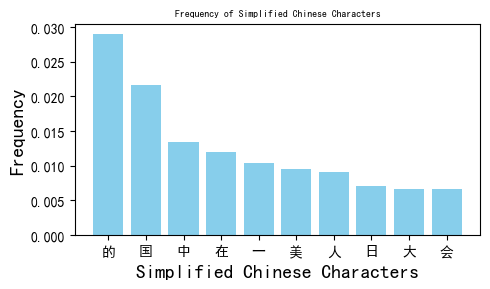

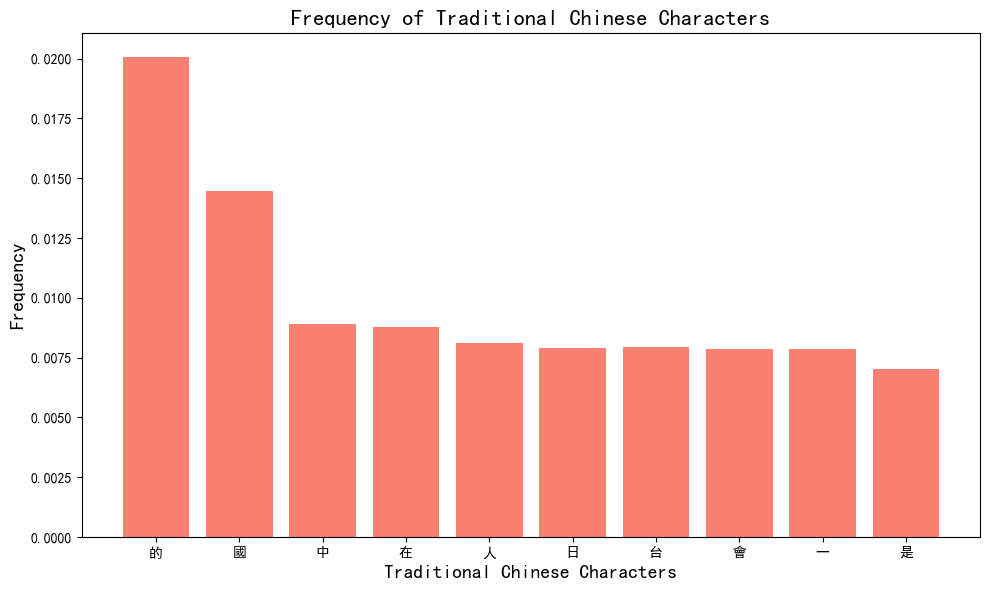

In [ ]:
from matplotlib import rcParams


# Set font for Chinese characters
rcParams['font.sans-serif'] = ['SimHei']  # Use SimHei for Chinese
rcParams['axes.unicode_minus'] = False   # Avoid issues with minus signs



# Bar diagram for Simplified characters
plt.figure(figsize=(8, 4))  # Smaller figure size
plt.bar(finalDicS.keys(), finalDicS.values(), color='skyblue', width=0.6)  # Narrower bars
plt.xlabel("Simplified Chinese Characters", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("Frequency of Simplified Chinese Characters", fontsize=12)
plt.xticks(rotation=90, fontsize=8)  # Smaller font and vertical labels
plt.yticks(fontsize=8)  # Smaller font for y-axis
plt.tight_layout()
plt.show()

# Bar diagram for Traditional characters
plt.figure(figsize=(8, 4))  # Smaller figure size
plt.bar(finalDicT.keys(), finalDicT.values(), color='salmon', width=0.6)  # Narrower bars
plt.xlabel("Traditional Chinese Characters", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("Frequency of Traditional Chinese Characters", fontsize=12)
plt.xticks(rotation=90, fontsize=8)  # Smaller font and vertical labels
plt.yticks(fontsize=8)  # Smaller font for y-axis
plt.tight_layout()
plt.show()
